## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [2]:
!gdown 10az2O0mMUYwo1z5R7BKq7sU9hE0yRfYe

Downloading...
From: https://drive.google.com/uc?id=10az2O0mMUYwo1z5R7BKq7sU9hE0yRfYe
To: /content/Google_data_cleaned.csv
100% 990k/990k [00:00<00:00, 131MB/s]


In [3]:
import pandas as pd
dataset = pd.read_csv('/content/Google_data_cleaned.csv')
dataset

,Unnamed: 0,app,category,rating,reviews,installs,type,price,content_rating,genres,current_ver,android_ver,size(kb),update_month,update_year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,0,0.0,Everyone,Art & Design,1.0.0,4.0.3,19000.0,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3,14000.0,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,0,0.0,Everyone,Art & Design,1.2.4,4.0.3,8.7,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000,0,0.0,Teen,Art & Design,NaN,4.2,25000.0,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,0,0.0,Everyone,Art & Design;Creativity,1.1,4.4,2.8,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,10353,Sya9a Maroc - FR,FAMILY,4.5,38,5000,0,0.0,Everyone,Education,1.48,4.1,53000.0,7,2017
9654,10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,100,0,0.0,Everyone,Education,1.0,4.1,3.6,7,2018
9655,10355,Parkinson Exercices FR,MEDICAL,NaN,3,1000,0,0.0,Everyone,Medical,1.0,2.2,9.5,1,2017
9656,10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,1000,0,0.0,Mature 17+,Books & Reference,NaN,NaN,NaN,1,2015


## 2. Exploratory Data

In [4]:
dataset.shape

(9658, 15)

maka didapatkan dari dataset nya adalah 9658 dan shape nya 15

In [5]:
dataset.columns

Index(['Unnamed: 0', 'app', 'category', 'rating', 'reviews', 'installs',
       'type', 'price', 'content_rating', 'genres', 'current_ver',
       'android_ver', 'size(kb)', 'update_month', 'update_year'],
      dtype='object')

In [6]:
dataset.dtypes

Unnamed: 0          int64
app                object
category           object
rating            float64
reviews             int64
installs            int64
type                int64
price             float64
content_rating     object
genres             object
current_ver        object
android_ver        object
size(kb)          float64
update_month        int64
update_year         int64
dtype: object

terdapat 3 type pada data ini adalah int64, object dan float64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9658 entries, 0 to 9657
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9658 non-null   int64  
 1   app             9658 non-null   object 
 2   category        9658 non-null   object 
 3   rating          8196 non-null   float64
 4   reviews         9658 non-null   int64  
 5   installs        9658 non-null   int64  
 6   type            9658 non-null   int64  
 7   price           9658 non-null   float64
 8   content_rating  9658 non-null   object 
 9   genres          9658 non-null   object 
 10  current_ver     8596 non-null   object 
 11  android_ver     8667 non-null   object 
 12  size(kb)        8432 non-null   float64
 13  update_month    9658 non-null   int64  
 14  update_year     9658 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 1.1+ MB


In [8]:
dataset.nunique()

Unnamed: 0        9658
app               9658
category            33
rating              39
reviews           5330
installs            20
type                 2
price               92
content_rating       6
genres             118
current_ver       2816
android_ver         25
size(kb)           459
update_month        12
update_year          9
dtype: int64

berikut adalah hasil dataset.nunique pada masing-masing type 

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [9]:
dataset.isnull().sum()

Unnamed: 0           0
app                  0
category             0
rating            1462
reviews              0
installs             0
type                 0
price                0
content_rating       0
genres               0
current_ver       1062
android_ver        991
size(kb)          1226
update_month         0
update_year          0
dtype: int64

disini ada missing value dari dataset nya yaitu: rating=1462, current_ver= 1062, android_ver=991, size(kb)=1226

In [10]:
dataset['rating'].dtypes

dtype('float64')

In [ ]:
dataset['size(kb)'].dtypes

dtype('float64')

In [ ]:
dataset['current_ver'].dtypes

dtype('O')

In [ ]:
dataset['android_ver'].dtypes

dtype('O')

Perform imputer to handle missing value in numerical data

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

untuk menghitung missing value yang imputer atau selain object

In [12]:
imputer = imputer.fit(dataset[['rating', 'size(kb)']])
imputer

SimpleImputer()

In [13]:
dataset[['rating','size(kb)']] = imputer.transform(dataset[['rating','size(kb)']])
dataset.isnull().sum()

Unnamed: 0           0
app                  0
category             0
rating               0
reviews              0
installs             0
type                 0
price                0
content_rating       0
genres               0
current_ver       1062
android_ver        991
size(kb)             0
update_month         0
update_year          0
dtype: int64

type float64 atau numerik sudah tidak terjadi missing value, sisa type object yaitu currrent_ver dan android_ver

Using drop column tohandle missing value on categorical or object data

In [14]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Unnamed: 0        0
app               0
category          0
rating            0
reviews           0
installs          0
type              0
price             0
content_rating    0
genres            0
size(kb)          0
update_month      0
update_year       0
dtype: int64

disini semua type sudah bersih dari missing value

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [15]:
dataset.describe()

,Unnamed: 0,rating,reviews,installs,type,price,size(kb),update_month,update_year
count,9658.000000,9658.000000,9.658000e+03,9.658000e+03,9658.000000,9658.000000,9658.000000,9658.000000,9658.00000
mean,5273.607890,4.173243,2.166150e+05,7.778312e+06,0.078277,1.099413,18372.195837,6.364051,2017.34562
std,2991.145456,0.494338,1.831413e+06,5.376100e+07,0.268621,16.853021,21763.543700,2.659746,1.13764
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,2010.00000
25%,2716.250000,4.000000,2.500000e+01,1.000000e+03,0.000000,0.000000,6.200000,5.000000,2017.00000
50%,5356.500000,4.200000,9.670000e+02,1.000000e+05,0.000000,0.000000,16000.000000,7.000000,2018.00000
75%,7855.750000,4.500000,2.940800e+04,1.000000e+06,0.000000,0.000000,25000.000000,8.000000,2018.00000
max,10357.000000,5.000000,7.815831e+07,1.000000e+09,1.000000,400.000000,100000.000000,12.000000,2018.00000


menampilkan data-data yang numerik

<Axes: >

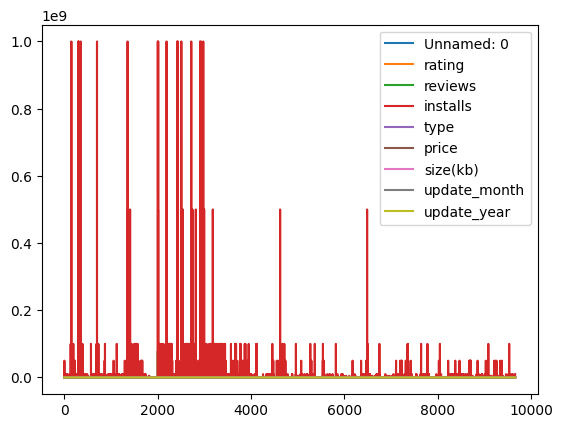

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

In [17]:
grafik line

SyntaxError: ignored

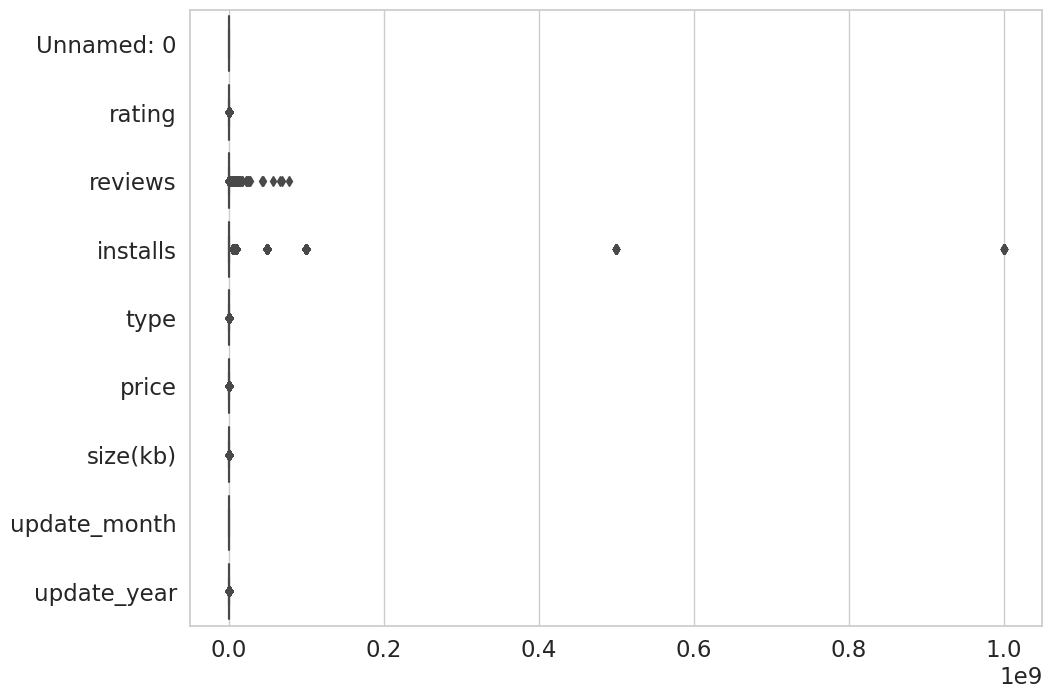

In [18]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

untuk menampilkan boxplot dan yang titik nya jauh ada install dan riviews

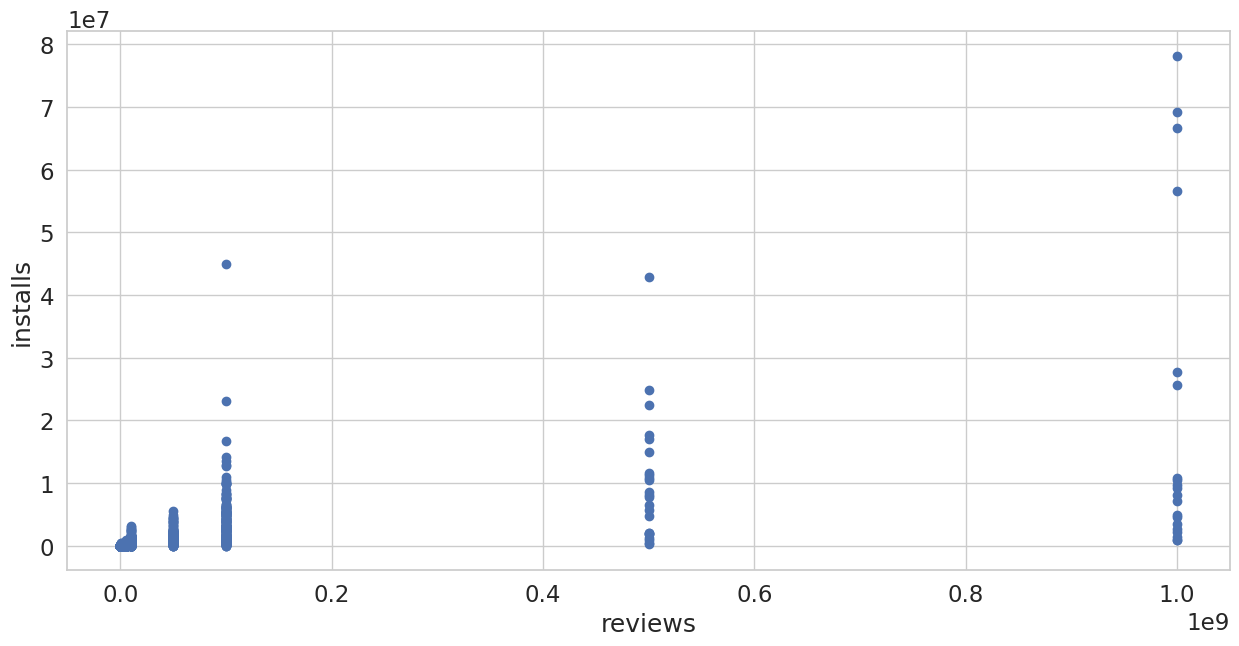

In [19]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['installs'], dataset['reviews'])
 
# x-axis label
ax.set_xlabel('reviews')
 
# y-axis label
ax.set_ylabel('installs')
plt.show()

terdapat 2 titik yaitu riviews dan install

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [20]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['reviews'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['reviews'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (9658, 13)


In [21]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['reviews'] > upper].index
outliers_lower = dataset[dataset['reviews'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (8002, 13)


<ipython-input-21-a6ef34acafed>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


outliers sudah hilang yang tadi nya 9658 menjadi 8002

In [22]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['installs'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['installs'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (8002, 13)


In [23]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['installs'] > upper].index
outliers_lower = dataset[dataset['installs'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (7539, 13)


<ipython-input-23-90edc1f281ee>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


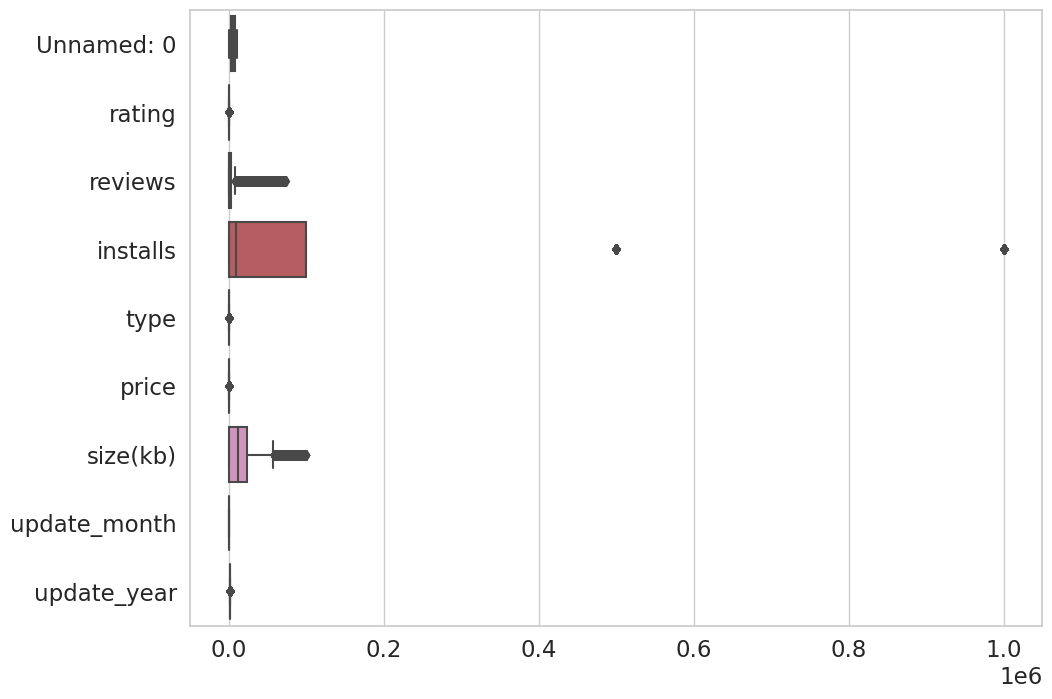

In [24]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

melihat outliers nya masih ada atau tidak dengan cara melihat boxplot

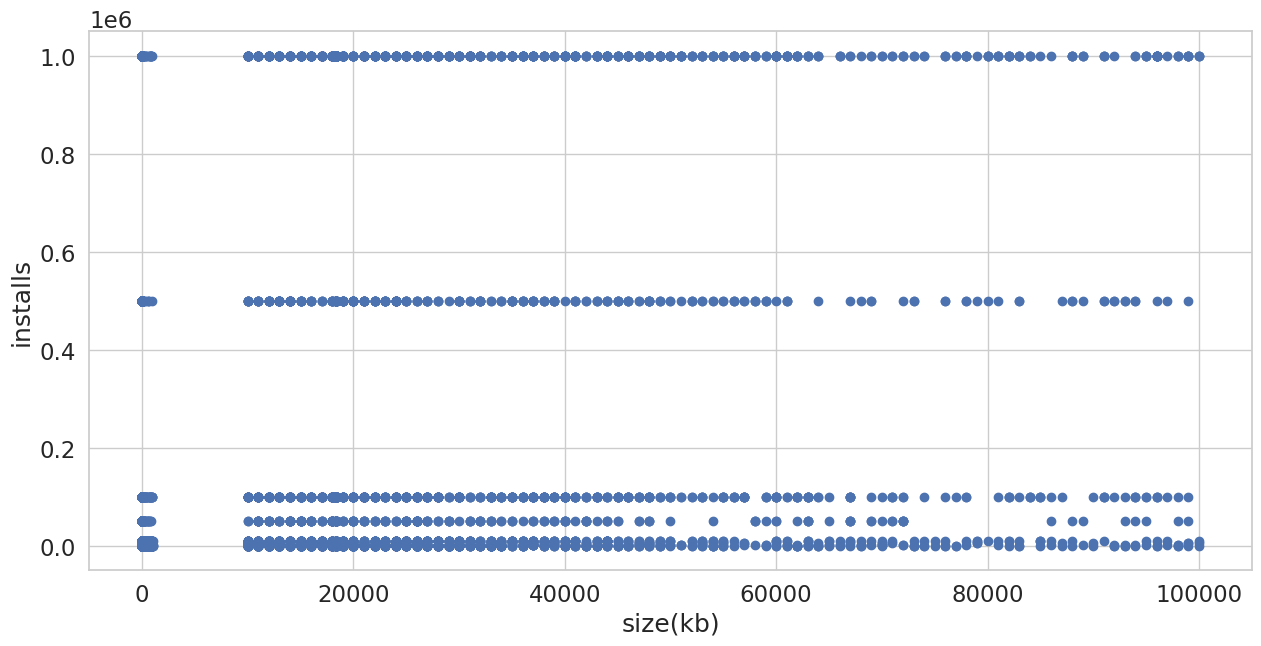

In [25]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['size(kb)'], dataset['installs'])
 
# x-axis label
ax.set_xlabel('size(kb)')
 
# y-axis label
ax.set_ylabel('installs')
plt.show()

cek lagi menggunakan scatterr plot, disini udah bersih akarena tidak jauh jarak titik nya

Show data distribution based on density (kde - kernel density estimation)

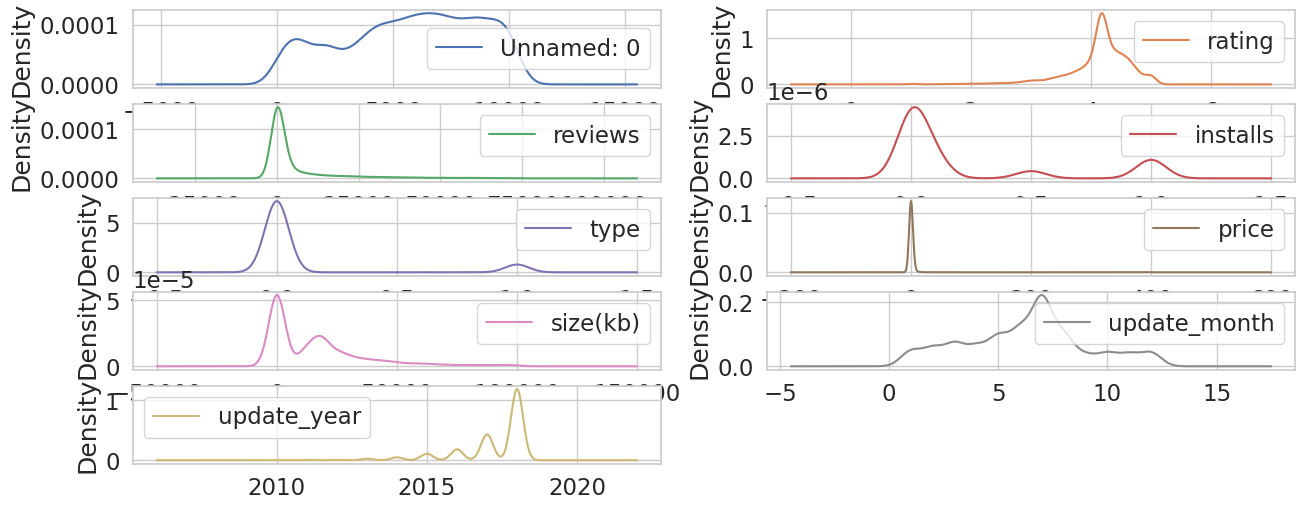

In [26]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

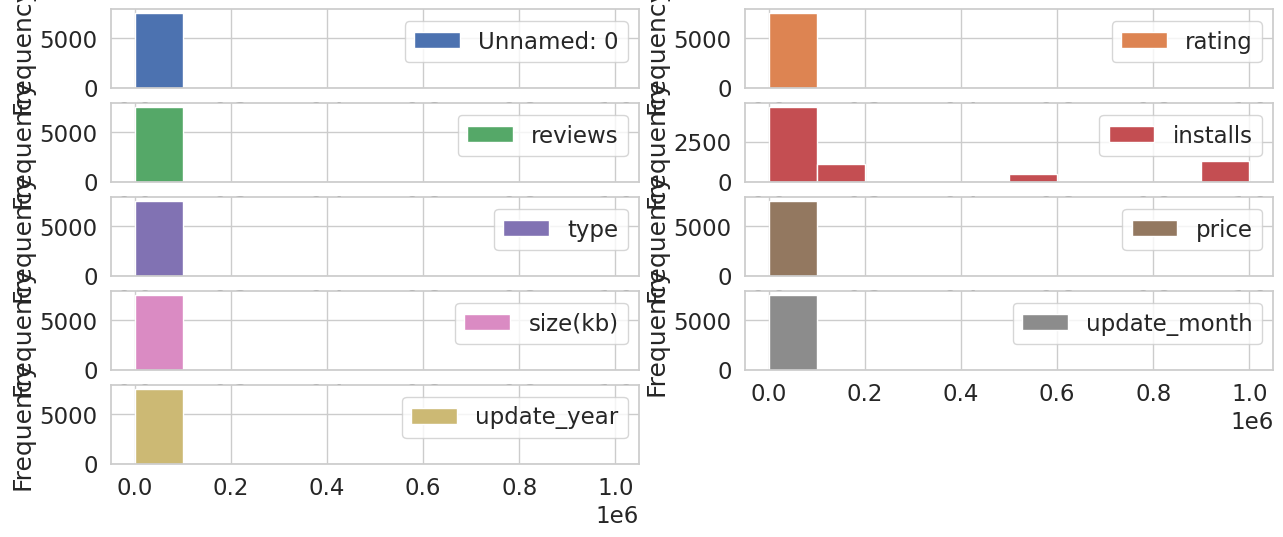

In [27]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

menggunakan histogram

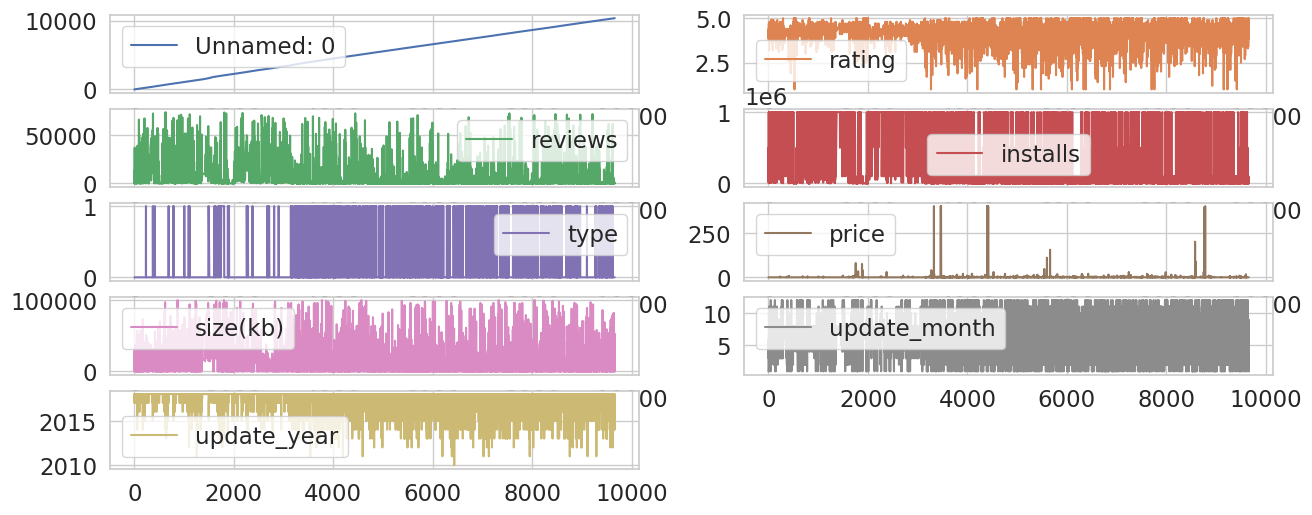

In [28]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

menggunakan grafik line

**3.2 CORRELATION MATRIX**

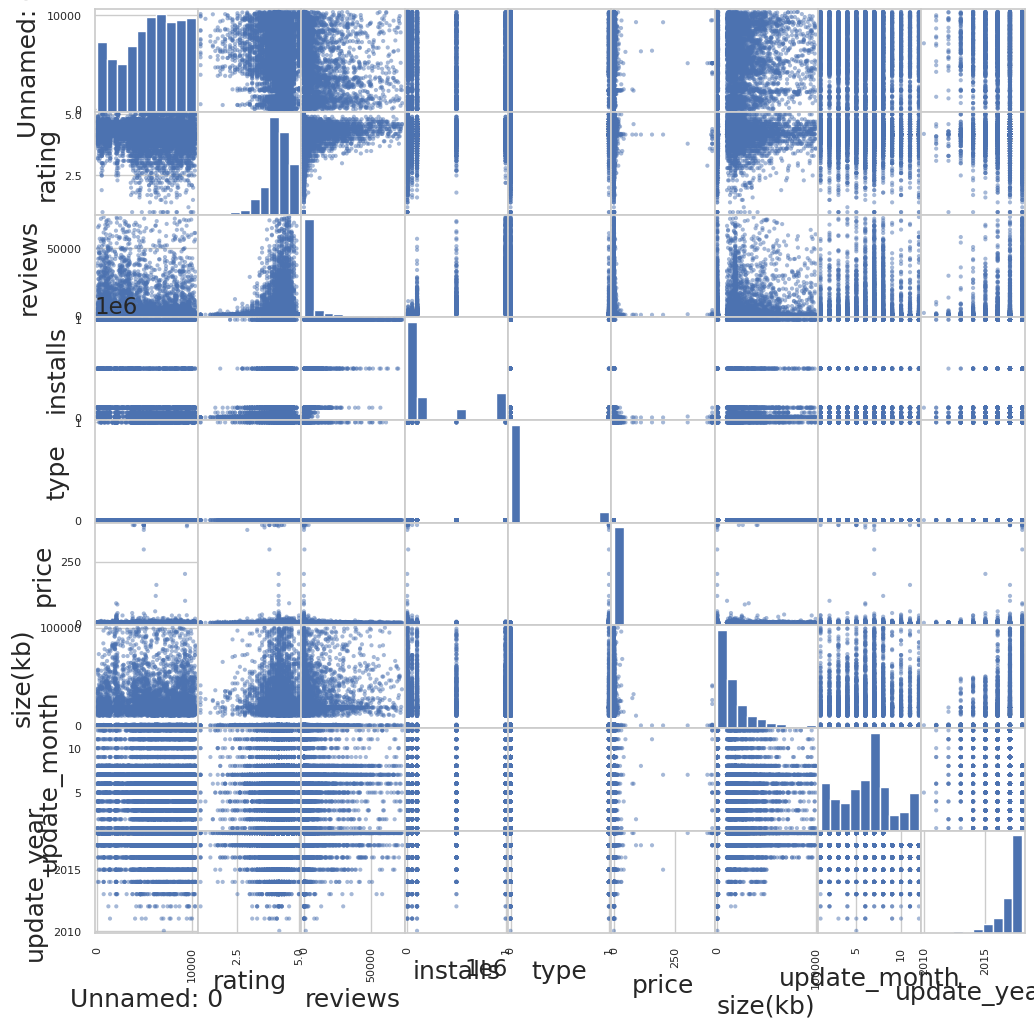

In [29]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

untuk mengecek keterkaitan korelasi dengan satu sama lain

correlation matrix with heatmap

<ipython-input-30-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


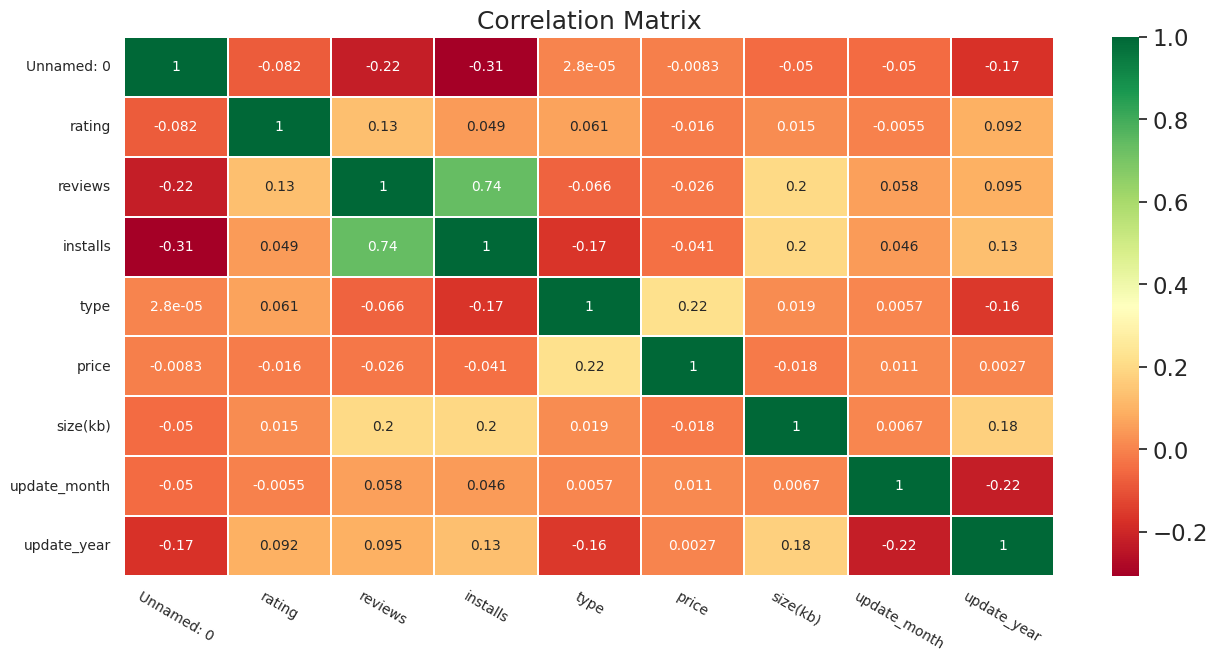

In [30]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

menggunakan hitmat, untuk mengecek  menentukan sumbu x nya

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [31]:
x = dataset.drop('type', axis=1)
x

,Unnamed: 0,app,category,rating,reviews,installs,price,content_rating,genres,size(kb),update_month,update_year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,10000,0.0,Everyone,Art & Design,19000.000000,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.900000,967,500000,0.0,Everyone,Art & Design;Pretend Play,14000.000000,1,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,100000,0.0,Everyone,Art & Design;Creativity,2.800000,6,2018
5,5,Paper flowers instructions,ART_AND_DESIGN,4.400000,167,50000,0.0,Everyone,Art & Design,5.600000,3,2017
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.800000,178,50000,0.0,Everyone,Art & Design,19000.000000,4,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
9652,10352,FR Forms,BUSINESS,4.173243,0,10,0.0,Everyone,Business,9.600000,9,2016
9653,10353,Sya9a Maroc - FR,FAMILY,4.500000,38,5000,0.0,Everyone,Education,53000.000000,7,2017
9654,10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,100,0.0,Everyone,Education,3.600000,7,2018
9655,10355,Parkinson Exercices FR,MEDICAL,4.173243,3,1000,0.0,Everyone,Medical,9.500000,1,2017


Choose feature Type as a label

In [32]:
y = dataset["type"]
y

0       0
1       0
4       0
5       0
6       0
       ..
9652    0
9653    0
9654    0
9655    0
9656    0
Name: type, Length: 7539, dtype: int64

In [34]:
y.values.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [33]:
x = pd.get_dummies(x)
x

,Unnamed: 0,rating,reviews,installs,price,size(kb),update_month,update_year,"app_""i DT"" Fútbol. Todos Somos Técnicos.",app_+Download 4 Instagram Twitter,...,genres_Strategy;Action & Adventure,genres_Strategy;Education,genres_Tools,genres_Travel & Local,genres_Travel & Local;Action & Adventure,genres_Trivia,genres_Trivia;Education,genres_Video Players & Editors,genres_Weather,genres_Word
0,0,4.100000,159,10000,0.0,19000.000000,1,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.900000,967,500000,0.0,14000.000000,1,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4.300000,967,100000,0.0,2.800000,6,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,4.400000,167,50000,0.0,5.600000,3,2017,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,3.800000,178,50000,0.0,19000.000000,4,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9652,10352,4.173243,0,10,0.0,9.600000,9,2016,0,0,...,0,0,0,0,0,0,0,0,0,0
9653,10353,4.500000,38,5000,0.0,53000.000000,7,2017,0,0,...,0,0,0,0,0,0,0,0,0,0
9654,10354,5.000000,4,100,0.0,3.600000,7,2018,0,0,...,0,0,0,0,0,0,0,0,0,0
9655,10355,4.173243,3,1000,0.0,9.500000,1,2017,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
x.shape

(7539, 7695)

melihat shape

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [36]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,7685,7686,7687,7688,7689,7690,7691,7692,7693,7694
0,-1.954267,-0.071471,-0.433324,-0.571711,-0.073542,0.157305,-1.874186,0.635298,-0.011518,-0.011518,...,-0.01629,-0.011518,-0.306134,-0.148656,-0.011518,-0.067308,-0.011518,-0.122801,-0.085726,-0.039928
1,-1.953924,-0.447372,-0.364525,0.744525,-0.073542,-0.087186,-1.874186,0.635298,-0.011518,-0.011518,...,-0.01629,-0.011518,-0.306134,-0.148656,-0.011518,-0.067308,-0.011518,-0.122801,-0.085726,-0.039928
2,-1.952897,0.304430,-0.364525,-0.329953,-0.073542,-0.771625,-0.090520,0.635298,-0.011518,-0.011518,...,-0.01629,-0.011518,-0.306134,-0.148656,-0.011518,-0.067308,-0.011518,-0.122801,-0.085726,-0.039928
3,-1.952554,0.492380,-0.432643,-0.464263,-0.073542,-0.771488,-1.160720,-0.203496,-0.011518,-0.011518,...,-0.01629,-0.011518,-0.306134,-0.148656,-0.011518,-0.067308,-0.011518,-0.122801,-0.085726,-0.039928
4,-1.952212,-0.635322,-0.431706,-0.464263,-0.073542,0.157305,-0.803986,0.635298,-0.011518,-0.011518,...,-0.01629,-0.011518,-0.306134,-0.148656,-0.011518,-0.067308,-0.011518,-0.122801,-0.085726,-0.039928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7534,1.591323,0.066190,-0.446862,-0.598546,-0.073542,-0.771293,0.979680,-1.042289,-0.011518,-0.011518,...,-0.01629,-0.011518,-0.306134,-0.148656,-0.011518,-0.067308,-0.011518,-0.122801,-0.085726,-0.039928
7535,1.591666,0.680331,-0.443627,-0.585142,-0.073542,1.819847,0.266213,-0.203496,-0.011518,-0.011518,...,-0.01629,-0.011518,-0.306134,-0.148656,-0.011518,-0.067308,-0.011518,-0.122801,-0.085726,-0.039928
7536,1.592008,1.620083,-0.446522,-0.598304,-0.073542,-0.771586,0.266213,0.635298,-0.011518,-0.011518,...,-0.01629,-0.011518,-0.306134,-0.148656,-0.011518,-0.067308,-0.011518,-0.122801,-0.085726,-0.039928
7537,1.592351,0.066190,-0.446607,-0.595887,-0.073542,-0.771298,-1.874186,-0.203496,-0.011518,-0.011518,...,-0.01629,-0.011518,-0.306134,-0.148656,-0.011518,-0.067308,-0.011518,-0.122801,-0.085726,-0.039928


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [37]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,7685,7686,7687,7688,7689,7690,7691,7692,7693,7694
0,0.000000,0.775000,0.002166,0.01000,0.0,0.189992,0.000000,1.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000097,0.725000,0.013174,0.50000,0.0,0.139991,0.000000,1.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000386,0.825000,0.013174,0.10000,0.0,0.000018,0.454545,1.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000483,0.850000,0.002275,0.05000,0.0,0.000046,0.181818,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000579,0.700000,0.002425,0.05000,0.0,0.189992,0.272727,1.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7534,0.999614,0.793311,0.000000,0.00001,0.0,0.000086,0.727273,0.750,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7535,0.999710,0.875000,0.000518,0.00500,0.0,0.529995,0.545455,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7536,0.999807,1.000000,0.000054,0.00010,0.0,0.000026,0.545455,1.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7537,0.999903,0.793311,0.000041,0.00100,0.0,0.000085,0.000000,0.875,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


agar  nilai nya antara 0 dan 1, sehingga hasil nya anatara 0 dan 1

**4.3 Splitting**

In [38]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [39]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 5438, 1: 593})
Test distribution Counter({0: 1360, 1: 148})


dilakukan splitting dirun agar dapat memisahkan untuk menguji model (fasting data) dan membuat model (training data) supaya hasil nya tidak bias

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [40]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [41]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.908139 (0.010665)


In [42]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [43]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.9098143236074271


[[1356    4]
 [ 132   16]]


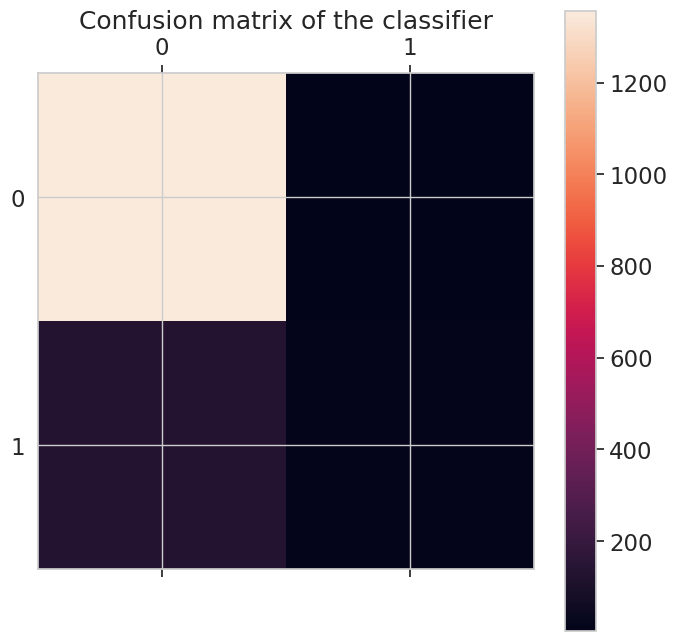

In [44]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

MELINA (3333210023)
KELAS C
deskripsi 
kagle : https://www.kaggle.com/datasets/yash16jr/google-play-store-cleaned
Terdapat 4 missing value = rating, size(kb), current_ver, android_ver.
-float = rating dan size(kb)
-objek = current_ver dan android_ver

In [45]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1360
           1       0.80      0.11      0.19       148

    accuracy                           0.91      1508
   macro avg       0.86      0.55      0.57      1508
weighted avg       0.90      0.91      0.88      1508



In [47]:
dataset.isnull().sum()

Unnamed: 0        0
app               0
category          0
rating            0
reviews           0
installs          0
type              0
price             0
content_rating    0
genres            0
size(kb)          0
update_month      0
update_year       0
dtype: int64

In [48]:
dataset = dataset.dropna(axis=1)
dataset.head()

,Unnamed: 0,app,category,rating,reviews,installs,type,price,content_rating,genres,size(kb),update_month,update_year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,0,0.0,Everyone,Art & Design,19000.0,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,Everyone,Art & Design;Pretend Play,14000.0,1,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,0,0.0,Everyone,Art & Design;Creativity,2.8,6,2018
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,50000,0,0.0,Everyone,Art & Design,5.6,3,2017
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,50000,0,0.0,Everyone,Art & Design,19000.0,4,2018


In [50]:
dataset = dataset.drop('content_rating', axis=1)
dataset.head()

,Unnamed: 0,app,category,rating,reviews,installs,type,price,genres,size(kb),update_month,update_year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,0,0.0,Art & Design,19000.0,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,0,0.0,Art & Design;Pretend Play,14000.0,1,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000,0,0.0,Art & Design;Creativity,2.8,6,2018
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,50000,0,0.0,Art & Design,5.6,3,2017
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,50000,0,0.0,Art & Design,19000.0,4,2018


In [51]:
dataset.describe()

,Unnamed: 0,rating,reviews,installs,type,price,size(kb),update_month,update_year
count,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000,7539.000000
mean,5705.839501,4.138026,5248.131052,222832.938984,0.098289,1.401881,15783.009119,6.253747,2017.242605
std,2919.876919,0.532091,11745.181023,372298.415969,0.297725,19.063578,20451.971672,2.803401,1.192267
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2010.000000
25%,3579.500000,4.000000,11.000000,1000.000000,0.000000,0.000000,5.100000,4.000000,2017.000000
50%,6006.000000,4.173243,193.000000,10000.000000,0.000000,0.000000,12000.000000,7.000000,2018.000000
75%,8168.500000,4.400000,3484.000000,100000.000000,0.000000,0.000000,23000.000000,8.000000,2018.000000
max,10356.000000,5.000000,73404.000000,1000000.000000,1.000000,400.000000,100000.000000,12.000000,2018.000000


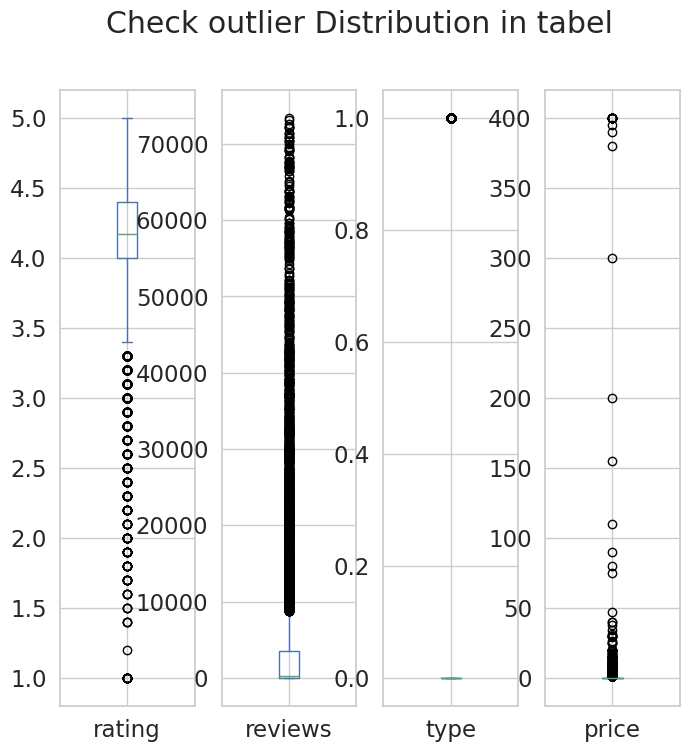

In [52]:
outlier = dataset[['rating','reviews','type','price']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,4),
                                                      sharex = False, sharey = False,
                                                      title='Check outlier Distribution in tabel')
plt.show()